In [2]:
import pymrio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

exio3 = pymrio.parse_exiobase3(path='IOT_2015_ixi.zip')

exio3.calc_all()

In [3]:
categories = list({i[1] for i in exio3.Y.columns})

sectors = exio3.satellite.get_sectors()
sectors_land = [s for s in sectors if 'forestry' in s.lower() or 'land' in s.lower() or 'grazing' in s.lower()]

impacts = exio3.satellite.F.index
U   = exio3.satellite.unit
impacts_land = U[U.unit=='km2'].index

In [4]:
E         = np.matrix(exio3.satellite.F)*np.matrix(exio3.L)*np.matrix(exio3.Y) #matrice E
E_df      = pd.DataFrame(data=E,index=impacts,columns=exio3.Y.columns) #E into DataFrame
cat_fr    = [col for col in E_df.columns if col[0]=='FR']
E_fr_all  = E_df[cat_fr] #E restricted to French sectors
E_fr_land = E_df[cat_fr].loc[impacts_land] #E_fr restricted to Land impacts
E_fr_land.columns = [col[1] for col in E_fr_land.columns]


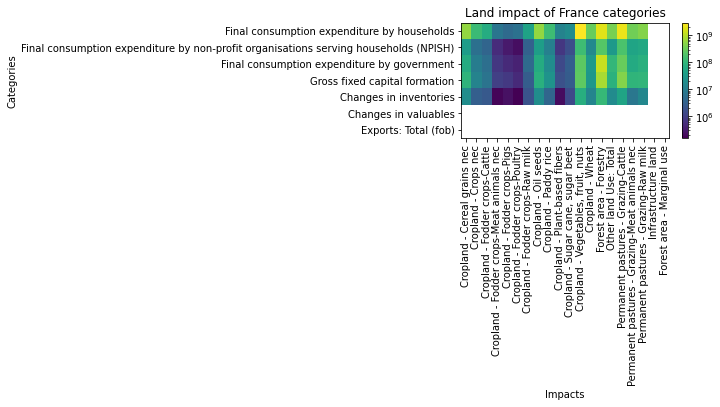

In [5]:
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(left=0.3, right=0.9, top=0.8, bottom=0.4)
size_x = 5
size_y = 1
min_value = E_fr_land[E_fr_land > 0].min().min()
im = ax.imshow(E_fr_land.T,extent=[0,size_x,0,size_y],norm=LogNorm(vmin=min_value),aspect='auto')
ax.set_ylabel('Categories')
ax.set_xlabel('Impacts')
ax.set_yticks(np.linspace(1/14,size_y-1/14,7))
ax.set_xticks(np.linspace(1/10,size_x-1/10,20))
ax.set_yticklabels(reversed(E_fr_land.columns))
ax.set_xticklabels(E_fr_land.index,rotation=90)
ax.set_title('Land impact of France categories')
fig.colorbar(im)
plt.show()